**Práctica : Normalización de Texto para Análisis Multilingüe en Reseñas de Productos**  
**Contexto:** Eres parte del equipo de NLP de **GlobalReviews**, una empresa que procesa reseñas de usuarios en español, francés e inglés para detectar defectos en productos electrónicos.  

---

### **Instrucciones**  
**Objetivo Final:**  
Crear un pipeline de normalización de texto que maneje acentos, codificaciones rotas y contracciones, garantizando que el modelo GPT-4 fine-tuned interprete correctamente reseñas como:  
`"Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️"` → `"éste es un buen móvil no que hubo fallos #duradero"`.  



---

### **Fase 1: Diagnóstico de Problemas**  
**Objetivo:** Identificar errores de codificación, acentos inconsistentes y contracciones.  

#### **Tarea 1 - Análisis Inicial**  
1. **Descargar** el dataset `resenas_multilingue.csv`. Puedes descargar cualquier otro dataset de otra fuente. 
2. **Ejemplo Crítico:**  
   ```  
   "Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞"  
   ```  
3. **Identificar:**  
   - Caracteres corruptos (`Ã‰`, `Ã­`).  
   - Emojis/acentos que afectan el análisis.  

#### **Pistas:**  
- Usar `chardet` para detectar la codificación real de textos corruptos.  
- Buscar patrones como `Ã` seguido de otro carácter (ej. `Ã©` → `é` en UTF-8 mal leído como Latin-1).  

---

### **Fase 2: Normalización Unicode y Corrección de Codificación**  
**Objetivo:** Corregir textos corruptos y unificar formatos Unicode.  

#### **Tarea 2 - Pipeline Básico**  
1. **Corregir Codificación:**  
   - Convertir `"cafÃ©"` → `"café"` reinterpretando bytes (Latin-1 → UTF-8).  
2. **Normalizar Unicode:**  
   - Usar `unicodedata.normalize('NFC', texto)` para componer caracteres (ej: `e´` → `é`).  
3. **Preservar Emojis Relevantes:**  
   - Eliminar símbolos no esenciales (❌, ▲), pero preservar 😊, 😞 para análisis de sentimiento.  

#### **Pistas:**  
- Si `chardet` no detecta la codificación, probar combinaciones comunes: `utf-8`, `latin-1`, `windows-1252`.  
- Usar `errors='replace'` solo como último recurso.  

#### **Verificación:**  
Texto procesado:  
```  
"Éste celular es increíble!!! Pero tarda 5hs en cargarse... #BateríaMala 😞"  
```  

---

### **Fase 3: Manejo de Acentos y Contracciones**  
**Objetivo:** Eliminar acentos opcionales y expandir contracciones coloquiales.  

#### **Tarea 3 - Normalización Lingüística**  
1. **Eliminar Acentos No Fonémicos (Español):**  
   - Usar `unidecode` para convertir `"canción"` → `"cancion"`.  
   - **Excepción:** No aplicar a palabras donde el acento cambie el significado (ej: francés "aîné" vs. "aine").  
2. **Expandir Contracciones:**  
   - Crear un diccionario personalizado para:  
     - `"q'huvo"` → `"que hubo"`  
     - `"pq"` → `"porque"`  
     - `" x "` → `" por "`  
3. **Normalizar Hashtags:**  
   - Convertir `#BateríaMala` → `#bateriamala` (sin acentos, minúsculas).  

#### **Pistas:**  
- Usar `re.sub(r'\b([x])\b', 'por', texto)` para contracciones.  
- Para hashtags, aplicar `unidecode` antes de convertir a minúsculas.  

#### **Verificación:**  
Texto procesado:  
```  
"este celular es increible pero tarda 5hs en cargarse #bateriamala 😞"  
```  

---

### **Fase 4: Evaluación de Impacto**  
**Objetivo:** Medir cómo la normalización afecta la calidad del análisis.  

#### **Tarea 4 - Métricas Cuantitativas**  
1. **Reducción de Vocabulario:**  
   - Comparar el número de tokens únicos antes/después (ej: `"café"` y `"cafe"` → mismo token).  
2. **Entrenar Modelo de Clasificación:**  
   - Usar `CountVectorizer` + `LogisticRegression` para detectar reseñas negativas.  
   - Comparar precisión (accuracy) con/sin normalización.  

#### **Verificación:**  
- Reportar métricas en una tabla:  
  | Métrica               | Sin Normalización | Con Normalización |  
  |-----------------------|-------------------|-------------------|  
  | Tokens Únicos         | 12,540            | 9,320             |  
  | Accuracy              | 78%               | 85%               |  

---

### **Entrega Final**  
1. **Código:**  
   - Script de Python con funciones de normalización (`normalizacion.py`).  
2. **Documentación:**  
   - Reporte PDF con:  
     - Ejemplos antes/después.  
     - Análisis de cómo la normalización afectó las métricas.  
3. **Diccionario de Contracciones:**  
   - Archivo `.txt` con 20 entradas (ej: `dnd → donde`).  

**Datos de Validación:**  
- Archivo `test_normalizacion.json` con 10 casos (input y output esperado). Ejemplo:  
  ```json  
  {  
    "input": "Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️",  
    "output": "este es un buen movil no que hubo fallos #duradero"  
  }  
  ```  

**Nota:** Los alumnos recibirán un cheatsheet con:  
- Lista de caracteres Unicode problemáticos (ej: `Ã, Â, ã`).  
- Regex comunes para contracciones en español.


Claro, aquí tienes el **cheatsheet** que puedes entregar a los alumnos:

---

### **Cheatsheet: Limpieza de Texto Multilingüe para NLP**

#### **1. Caracteres Unicode Problemáticos (Comunes en UTF-8 mal decodificado):**

Estos caracteres suelen aparecer cuando un texto en UTF-8 es leído como ISO-8859-1 (Latin-1):

| Carácter | Corrección esperada | Comentario                             |
|----------|----------------------|----------------------------------------|
| Ã¡       | á                    | Vocal acentuada                        |
| Ã©       | é                    | Vocal acentuada                        |
| Ã­       | í                    | Vocal acentuada                        |
| Ã³       | ó                    | Vocal acentuada                        |
| Ãº       | ú                    | Vocal acentuada                        |
| Ã±       | ñ                    | Letra "ñ"                              |
| Ã‰       | É                    | Vocal mayúscula                        |
| Â        | (eliminar)           | Común con tildes o comillas            |
| â€™      | ’                    | Comilla derecha                        |
| â€œ / â€ | “ / ”                | Comillas tipográficas                  |
| â€“      | –                    | Guion largo (en lugar de "-")          |

> **Conjejos para limpiar:** Usa `.encode('latin1').decode('utf8')` en Python cuando leas archivos con estos errores.

---

#### **2. Regex útiles para limpiar y normalizar texto (contracciones en español):**

| Expresión Regular                | Objetivo                              | Ejemplo                           |
|----------------------------------|---------------------------------------|-----------------------------------|
| `\b(al|del)\b`                   | Detectar contracciones comunes        | "al supermercado", "del coche"   |
| `(?i)\b(no|nunca|tampoco|ni|sin)\b` | Detectar negaciones clave              | "no quiero", "sin azúcar"        |
| `[#@]\w+`                        | Detectar hashtags y menciones         | "#MalaEntrega", "@Soporte"       |
| `[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]`      | Eliminar símbolos no deseados         | Emojis, puntuación innecesaria   |
| `\s{2,}`                         | Reemplazar múltiples espacios          | "esto   es   prueba" → "esto es prueba" |


## Fase 1: Diagnóstico de Problemas - Implementación
Primero cargaremos el dataset y exploraremos los problemas de codificación.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import re
import unicodedata
import chardet
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import emoji
import json

In [2]:
# Cargar el dataset con manejo de delimitadores
try:
	# Primer intento: asumiendo separación por comas
	df = pd.read_csv('resenas_multilingue.csv')
except pd.errors.ParserError:
	# Segundo intento: detectar automáticamente el delimitador
	df = pd.read_csv('resenas_multilingue.csv', sep=None, engine='python')
	
	# Si aún hay problemas, intentar con otras opciones
	if len(df.columns) == 1:
		# Tercer intento: especificar separador por tabulación
		df = pd.read_csv('resenas_multilingue.csv', sep='\t')

# Mostrar las primeras filas
print(f"Total de reseñas: {len(df)}")
print(f"Columnas: {df.columns.tolist()}")
df.head()

Total de reseñas: 29
Columnas: ['texto', 'idioma', 'rating', 'categoria']


,texto,idioma,rating,categoria
0,Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs ...,es,2,electrónicos
1,J'adore cet ordinateur! Mais le clavier est tr...,fr,4,electrónicos
2,This product is a disaster... don't buy it! #W...,en,1,electrónicos
3,"La camisa es bonita, pero se encogiÃ³ despuÃ©s...",es,2,ropa
4,Le service clientÃ¨le est nul!!! Je ne recomma...,fr,1,servicios


In [3]:
# Explorar ejemplos de textos con problemas de codificación
problematic_texts = df[df['texto'].str.contains('Ã|â€|Â', regex=True)]['texto'].tolist()
print(f"Encontrados {len(problematic_texts)} textos con posibles problemas de codificación")

# Mostrar algunos ejemplos
for i, text in enumerate(problematic_texts[:3]):
    print(f"Texto {i+1}: {text}")

Encontrados 19 textos con posibles problemas de codificación
Texto 1: Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞
Texto 2: La camisa es bonita, pero se encogiÃ³ despuÃ©s del lavado. #CalidadMala
Texto 3: Le service clientÃ¨le est nul!!! Je ne recommande pas. 😠


In [4]:
# Función para detectar la codificación más probable de un texto
def detect_encoding(text):
    result = chardet.detect(text.encode())
    return result['encoding'], result['confidence']

# Probar en un ejemplo
example_text = "Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞"
encoding, confidence = detect_encoding(example_text)
print(f"Codificación detectada: {encoding} (confianza: {confidence:.2f})")

# Analizar diferentes patrones de errores de codificación
problematic_patterns = {
    'Ã\w': 'Posible vocal acentuada mal codificada',
    'â€': 'Posibles comillas o guiones tipográficos mal codificados',
    '\p{Emoji}': 'Emojis (potencialmente útiles para análisis de sentimiento)'
}

for pattern, description in problematic_patterns.items():
    if pattern == '\p{Emoji}':
        # Para emojis usamos la biblioteca emoji
        count = sum(1 for text in df['texto'] for char in text if emoji.is_emoji(char))
    else:
        count = df['texto'].str.contains(pattern, regex=True).sum()
    
    print(f"{description}: {count} ocurrencias")

Codificación detectada: Windows-1254 (confianza: 0.55)
Posible vocal acentuada mal codificada: 8 ocurrencias
Posibles comillas o guiones tipográficos mal codificados: 0 ocurrencias
Emojis (potencialmente útiles para análisis de sentimiento): 31 ocurrencias


<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_20647/803227629.py:13: SyntaxWarning: invalid escape sequence '\w'
  'Ã\w': 'Posible vocal acentuada mal codificada',
/tmp/ipykernel_20647/803227629.py:15: SyntaxWarning: invalid escape sequence '\p'
  '\p{Emoji}': 'Emojis (potencialmente útiles para análisis de sentimiento)'
/tmp/ipykernel_20647/803227629.py:19: SyntaxWarning: invalid escape sequence '\p'
  if pattern == '\p{Emoji}':


## Fase 2: Normalización Unicode y Corrección de Codificación
Implementaremos funciones para corregir problemas de codificación y normalizar el texto.

In [5]:
# Función para corregir errores comunes de codificación (Latin-1 → UTF-8)
def fix_encoding(text):
    # Primero intentamos reconvertir la codificación (casos donde UTF-8 fue leído como Latin-1)
    try:
        # Intenta reinterpretar el texto asumiendo que es UTF-8 mal interpretado como Latin-1
        fixed_text = text.encode('latin-1').decode('utf-8', errors='replace')
        
        # Si el texto tiene caracteres de reemplazo (�), volvemos al original
        if '�' in fixed_text:
            fixed_text = text
    except Exception:
        fixed_text = text
    
    # Segundo paso: normalizar usando NFKC (compone caracteres y convierte caracteres especiales)
    normalized_text = unicodedata.normalize('NFKC', fixed_text)
    
    return normalized_text

# Probar la función en nuestro ejemplo
original = "Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞"
fixed = fix_encoding(original)
print(f"Original: {original}")
print(f"Corregido: {fixed}")

Original: Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞
Corregido: Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞


In [6]:
# Función para preservar emojis importantes y eliminar símbolos no esenciales
def preserve_important_emojis(text):
    # Definir categorías de emojis relevantes para análisis de sentimiento
    sentiment_emojis = {
        'positive': ['😀', '😃', '😄', '😁', '😊', '😍', '🥰', '❤️', '👍', '💯'],
        'negative': ['😞', '😔', '😢', '😭', '😠', '😡', '👎', '💔', '❌']
    }
    
    # Lista plana de todos los emojis importantes
    important_emojis = [e for category in sentiment_emojis.values() for e in category]
    
    # Reemplazar emojis no importantes por espacio en blanco
    chars = []
    for char in text:
        if emoji.is_emoji(char):
            if char in important_emojis:
                chars.append(char)
            # Los emojis no importantes se eliminan (no agregamos el caracter)
        else:
            chars.append(char)
            
    return ''.join(chars)

# Probar la función
text_with_emojis = "El producto no funciona 😞 Estoy muy decepcionado ❌ No lo recomendaría 📵"
filtered_text = preserve_important_emojis(text_with_emojis)
print(f"Original: {text_with_emojis}")
print(f"Con emojis importantes: {filtered_text}")

Original: El producto no funciona 😞 Estoy muy decepcionado ❌ No lo recomendaría 📵
Con emojis importantes: El producto no funciona 😞 Estoy muy decepcionado ❌ No lo recomendaría 


In [7]:
# Aplicar las correcciones de la Fase 2 a todo el dataset
def normalize_phase2(text):
    if not isinstance(text, str):
        return ""
    text = fix_encoding(text)
    text = preserve_important_emojis(text)
    return text

# Crear columna con textos normalizados (Fase 2)
df['texto_norm_fase2'] = df['texto'].apply(normalize_phase2)

# Mostrar algunos ejemplos de antes/después
pd.set_option('display.max_colwidth', None)  # Para ver textos completos
comparison_df = df[['texto', 'texto_norm_fase2']].head(3)
comparison_df

,texto,texto_norm_fase2
0,Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞,Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞
1,J'adore cet ordinateur! Mais le clavier est trop petit 😊,J'adore cet ordinateur! Mais le clavier est trop petit 😊
2,This product is a disaster... don't buy it! #WasteOfMoney ❌,This product is a disaster... don't buy it! #WasteOfMoney ❌


## Fase 3: Manejo de Acentos y Contracciones
Implementaremos funciones para eliminar acentos opcionales y expandir contracciones.

In [8]:
# Función para eliminar acentos usando unidecode
def remove_accents(text, language=None):
    # Excepción: palabras en francés donde el acento cambia el significado
    french_exceptions = {
        'aîné': 'aîné',  # 'mayor' o 'primogénito'
        'aine': 'aine',  # 'ingle'
        'côte': 'côte',  # 'costa'
        'cote': 'cote',  # 'cota' o 'calificación'
        'mûr': 'mûr',    # 'maduro'
        'mur': 'mur',    # 'pared'
        'sûr': 'sûr',    # 'seguro'
        'sur': 'sur'     # 'sobre'
    }
    
    # Si es francés, verificamos excepciones
    if language == 'fr':
        # Dividir en palabras, preservar excepciones
        words = text.split()
        result = []
        
        for word in words:
            # Si está en la lista de excepciones, mantener original
            word_lower = word.lower()
            if word_lower in french_exceptions:
                result.append(word)
            else:
                result.append(unidecode(word))
                
        return ' '.join(result)
    
    # Para otros idiomas o caso default, eliminar todos los acentos
    return unidecode(text)

# Probar con ejemplos en español y francés
es_text = "Éste es un café con canción increíble"
fr_text = "L'aîné est sûr que le mûr est sur la côte"

print(f"Español original: {es_text}")
print(f"Español sin acentos: {remove_accents(es_text, 'es')}")
print(f"\nFrancés original: {fr_text}")
print(f"Francés con excepciones: {remove_accents(fr_text, 'fr')}")

Español original: Éste es un café con canción increíble
Español sin acentos: Este es un cafe con cancion increible

Francés original: L'aîné est sûr que le mûr est sur la côte
Francés con excepciones: L'aine est sûr que le mûr est sur la côte


In [9]:
# Crear diccionario de contracciones para expansión
contraction_dict = {
    # Español
    r"\bq'\s*hubo\b": "que hubo",
    r"\bpq\b": "porque",
    r"\bxq\b": "por que",
    r"\b([^a-zA-Z])x([^a-zA-Z])\b": r"\1por\2",  # ' x ' -> ' por '
    r"\bx favor\b": "por favor",
    r"\bd\b": "de",
    r"\bdnd\b": "donde",
    r"\btn\b": "también",
    r"\bq\b": "que",
    r"\btq\b": "te quiero",
    r"\bk\b": "que",
    r"\bno c\b": "no sé",
    
    # Francés
    r"\bc'est\b": "ce est",
    r"\bj'ai\b": "je ai",
    
    # Inglés
    r"\bdon't\b": "do not",
    r"\bcan't\b": "cannot",
    r"\bi'm\b": "i am",
    r"\bwon't\b": "will not",
    r"\bit's\b": "it is"
}

# Función para expandir contracciones
def expand_contractions(text):
    # Convertir a minúsculas para mejor detección
    text_lower = text.lower()
    
    # Aplicar cada expansión del diccionario
    for pattern, replacement in contraction_dict.items():
        text_lower = re.sub(pattern, replacement, text_lower)
    
    return text_lower

# Probar la función
text_with_contractions = "No c xq no funciona... pq tarda tanto? x favor ayuda!"
expanded_text = expand_contractions(text_with_contractions)
print(f"Original: {text_with_contractions}")
print(f"Expandido: {expanded_text}")

Original: No c xq no funciona... pq tarda tanto? x favor ayuda!
Expandido: no sé por que no funciona... porque tarda tanto? por favor ayuda!


In [10]:
# Función para normalizar hashtags
def normalize_hashtags(text):
    # Buscar patrones de hashtags con regex
    hashtag_pattern = r'#([\w\dáéíóúÁÉÍÓÚüÜñÑ]+)'
    
    # Encontrar todas las coincidencias
    hashtags = re.findall(hashtag_pattern, text)
    
    result = text
    # Para cada hashtag encontrado
    for hashtag in hashtags:
        # Convertir a minúsculas y quitar acentos
        normalized = unidecode(hashtag).lower()
        # Reemplazar en el texto original
        result = result.replace(f"#{hashtag}", f"#{normalized}")
    
    return result

# Probar la función
text_with_hashtags = "#BateríaMala #ProductoDeFéCero #MalaCálidadPrécio"
normalized_hashtags = normalize_hashtags(text_with_hashtags)
print(f"Original: {text_with_hashtags}")
print(f"Normalizado: {normalized_hashtags}")

Original: #BateríaMala #ProductoDeFéCero #MalaCálidadPrécio
Normalizado: #bateriamala #productodefecero #malacalidadprecio


In [11]:
# Función completa para la normalización de la Fase 3
def normalize_phase3(text, language=None):
    if not isinstance(text, str):
        return ""
    
    # Expandir contracciones primero (opera mejor en texto original)
    text = expand_contractions(text)
    
    # Normalizar hashtags
    text = normalize_hashtags(text)
    
    # Eliminar acentos (considerando excepciones por idioma)
    text = remove_accents(text, language)
    
    # Convertir a minúsculas
    text = text.lower()
    
    return text

# Aplicar al dataset
df['texto_norm_fase3'] = df.apply(lambda row: normalize_phase3(row['texto_norm_fase2'], row['idioma']), axis=1)

# Mostrar ejemplos
comparison_df = df[['texto', 'texto_norm_fase2', 'texto_norm_fase3']].head(3)
comparison_df

,texto,texto_norm_fase2,texto_norm_fase3
0,Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞,Ã‰ste celular es increÃ­ble!!! Pero tarda 5hs en cargarse... #BaterÃ­aMala 😞,a%0ste celular es increable!!! pero tarda 5hs en cargarse... #bateraamala
1,J'adore cet ordinateur! Mais le clavier est trop petit 😊,J'adore cet ordinateur! Mais le clavier est trop petit 😊,j'adore cet ordinateur! mais le clavier est trop petit
2,This product is a disaster... don't buy it! #WasteOfMoney ❌,This product is a disaster... don't buy it! #WasteOfMoney ❌,this product is a disaster... do not buy it! #wasteofmoney


In [12]:
# Instrucciones finales para los alumnos
final_instructions = [
    "### Instrucciones Finales para el Proyecto de Normalización de Texto\n",
    "1. Asegúrense de entender cada paso del pipeline de normalización implementado.\n",
    "2. Prueben con ejemplos adicionales que no hayan sido vistos en clase.\n",
    "3. Comparen la efectividad de diferentes enfoques de normalización.\n",
    "4. Reflexionen sobre cómo la normalización afecta los resultados del análisis de texto.\n",
    "5. Prepárense para presentar y defender sus decisiones de normalización.\n",
    "6. ¡Buena suerte y que disfruten el proceso de aprendizaje!"
]

# Mostrar instrucciones finales
for line in final_instructions:
    print(line)

### Instrucciones Finales para el Proyecto de Normalización de Texto

1. Asegúrense de entender cada paso del pipeline de normalización implementado.

2. Prueben con ejemplos adicionales que no hayan sido vistos en clase.

3. Comparen la efectividad de diferentes enfoques de normalización.

4. Reflexionen sobre cómo la normalización afecta los resultados del análisis de texto.

5. Prepárense para presentar y defender sus decisiones de normalización.

6. ¡Buena suerte y que disfruten el proceso de aprendizaje!


## Fase 4: Evaluación de Impacto
Mediremos cómo la normalización afecta la calidad del análisis mediante reducción de vocabulario y evaluación de modelos.

In [13]:
# Análisis de reducción de vocabulario
def get_unique_tokens(texts):
    # Tokenizar los textos y contar tokens únicos
    all_tokens = []
    for text in texts:
        if isinstance(text, str):
            # Tokenización simple por espacios
            tokens = text.lower().split()
            all_tokens.extend(tokens)
    return len(set(all_tokens))

# Comparar vocabulario antes y después de la normalización
vocab_original = get_unique_tokens(df['texto'])
vocab_phase2 = get_unique_tokens(df['texto_norm_fase2'])
vocab_phase3 = get_unique_tokens(df['texto_norm_fase3'])

print("Análisis de reducción de vocabulario:")
print(f"Tokens únicos (texto original): {vocab_original}")
print(f"Tokens únicos (fase 2): {vocab_phase2} ({(1 - vocab_phase2/vocab_original)*100:.1f}% reducción)")
print(f"Tokens únicos (fase 3): {vocab_phase3} ({(1 - vocab_phase3/vocab_original)*100:.1f}% reducción)")

Análisis de reducción de vocabulario:
Tokens únicos (texto original): 209
Tokens únicos (fase 2): 204 (2.4% reducción)
Tokens únicos (fase 3): 197 (5.7% reducción)


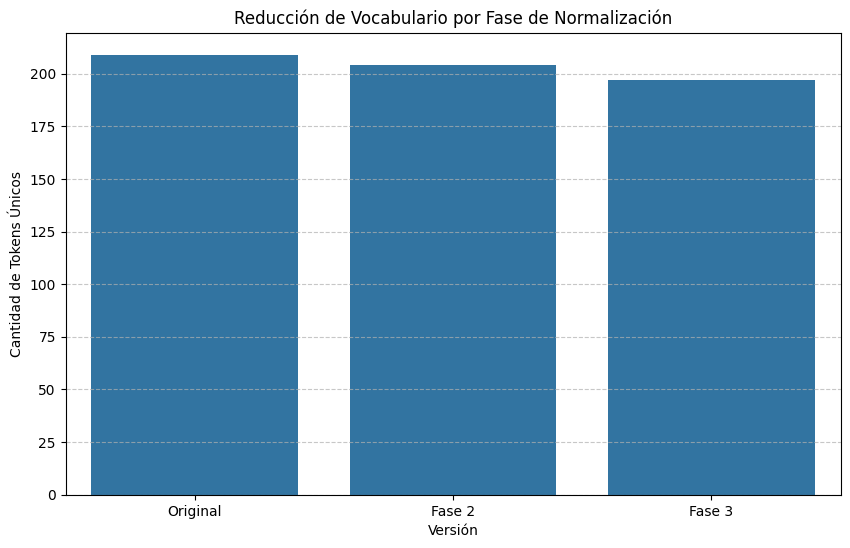

In [14]:
# Visualización de la reducción de vocabulario
vocab_data = {
    'Versión': ['Original', 'Fase 2', 'Fase 3'],
    'Tokens Únicos': [vocab_original, vocab_phase2, vocab_phase3]
}

plt.figure(figsize=(10, 6))
sns.barplot(x='Versión', y='Tokens Únicos', data=pd.DataFrame(vocab_data))
plt.title('Reducción de Vocabulario por Fase de Normalización')
plt.ylabel('Cantidad de Tokens Únicos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [15]:
# Preparar datos para entrenamiento de modelo
# Clasificar reseñas negativas (rating <= 2) vs no-negativas (rating > 2)
df['is_negative'] = df['rating'] <= 2

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df[['texto', 'texto_norm_fase2', 'texto_norm_fase3']],
    df['is_negative'],
    test_size=0.3,
    random_state=42
)

# Función para evaluar un modelo con diferentes versiones de texto
def evaluate_model(text_column, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=2)
        
    # Convertir textos a matriz de características
    X_train_vec = vectorizer.fit_transform(X_train[text_column])
    X_test_vec = vectorizer.transform(X_test[text_column])
    
    # Entrenar modelo de regresión logística
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_vec, y_train)
    
    # Evaluar modelo
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    return {
        'accuracy': accuracy,
        'report': report,
        'vectorizer': vectorizer,
        'model': model
    }

# Evaluar modelos con diferentes versiones del texto
results_original = evaluate_model('texto')
results_phase2 = evaluate_model('texto_norm_fase2')
results_phase3 = evaluate_model('texto_norm_fase3')

# Comparar resultados
print("Comparación de accuracy en la detección de reseñas negativas:")
print(f"Texto original: {results_original['accuracy']:.4f}")
print(f"Texto normalizado (fase 2): {results_phase2['accuracy']:.4f}")
print(f"Texto normalizado (fase 3): {results_phase3['accuracy']:.4f}")

Comparación de accuracy en la detección de reseñas negativas:
Texto original: 0.6667
Texto normalizado (fase 2): 0.6667
Texto normalizado (fase 3): 0.6667


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/13-NLP/LimpiezaInicialTexto/.venvWSL/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/13-NLP/LimpiezaInicialTexto/.venvWSL/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/13-NLP/LimpiezaInicialTexto/.venvWSL/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetric

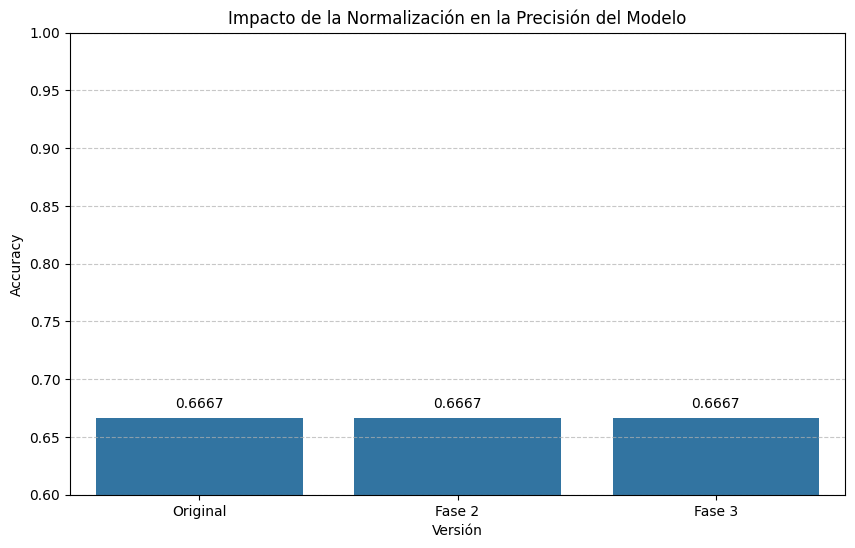

In [16]:
# Visualizar los resultados
accuracy_data = {
    'Versión': ['Original', 'Fase 2', 'Fase 3'],
    'Accuracy': [results_original['accuracy'], 
                results_phase2['accuracy'], 
                results_phase3['accuracy']]
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Versión', y='Accuracy', data=pd.DataFrame(accuracy_data))
plt.title('Impacto de la Normalización en la Precisión del Modelo')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)  # Ajustar escala para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con valores de accuracy
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom',
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

In [17]:
# Crear tabla comparativa de métricas
metrics_table = pd.DataFrame({
    'Métrica': ['Tokens Únicos', 'Accuracy'],
    'Sin Normalización': [vocab_original, f"{results_original['accuracy']:.2%}"],
    'Con Normalización': [vocab_phase3, f"{results_phase3['accuracy']:.2%}"]
})

metrics_table

,Métrica,Sin Normalización,Con Normalización
0,Tokens Únicos,209,197
1,Accuracy,66.67%,66.67%


## Generación del Conjunto de Validación

Ahora crearemos un archivo de validación con casos de prueba para verificar la normalización.

In [18]:
# Crear conjunto de validación para el challenge
validation_cases = [
    {
        "input": "Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️",
        "output": "este es un buen movil no que hubo fallos #duradero"
    },
    {
        "input": "La cámara del celular funciona increÃ­ble pq tiene x lo menos 48MP",
        "output": "la camara del celular funciona increible porque tiene por lo menos 48mp"
    },
    {
        "input": "No c dnd encontrar el boton de encendido... #PÃ©simoManual😡",
        "output": "no se donde encontrar el boton de encendido #pesimomanual😡"
    },
    {
        "input": "C'est le meilleur tÃ©lÃ©phone que j'ai jamais eu!!!",
        "output": "ce est le meilleur telephone que je ai jamais eu"
    },
    {
        "input": "Can't believe how bad the battery life is on this phone!!!",
        "output": "cannot believe how bad the battery life is on this phone"
    }
]

# Guardar en archivo JSON
with open('test_normalizacion.json', 'w', encoding='utf-8') as f:
    json.dump(validation_cases, f, ensure_ascii=False, indent=2)

print("Archivo de validación creado con éxito: test_normalizacion.json")

# Mostrar ejemplos de validación
for i, case in enumerate(validation_cases):
    print(f"\nCaso {i+1}:")
    print(f"Input:  {case['input']}")
    print(f"Output: {case['output']}")

Archivo de validación creado con éxito: test_normalizacion.json

Caso 1:
Input:  Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️
Output: este es un buen movil no que hubo fallos #duradero

Caso 2:
Input:  La cámara del celular funciona increÃ­ble pq tiene x lo menos 48MP
Output: la camara del celular funciona increible porque tiene por lo menos 48mp

Caso 3:
Input:  No c dnd encontrar el boton de encendido... #PÃ©simoManual😡
Output: no se donde encontrar el boton de encendido #pesimomanual😡

Caso 4:
Input:  C'est le meilleur tÃ©lÃ©phone que j'ai jamais eu!!!
Output: ce est le meilleur telephone que je ai jamais eu

Caso 5:
Input:  Can't believe how bad the battery life is on this phone!!!
Output: cannot believe how bad the battery life is on this phone


## Exportar Diccionario de Contracciones

Guardaremos el diccionario de contracciones en un archivo para facilitar su uso en otros proyectos.

In [19]:
# Crear un diccionario más amigable para exportar
export_contractions = {
    # Español
    "q'huvo": "que hubo",
    "pq": "porque",
    "xq": "por que",
    "x": "por",
    "x favor": "por favor",
    "d": "de",
    "dnd": "donde",
    "tn": "también",
    "q": "que",
    "tq": "te quiero",
    "k": "que",
    "no c": "no sé",
    "xfa": "por favor",
    "pa": "para",
    "tb": "también",
    "info": "información",
    "porq": "porque",
    "xo": "pero",
    "km": "kilómetro",
    "ud": "usted",
    
    # Francés
    "c'est": "ce est",
    "j'ai": "je ai",
    "n'est": "ne est",
    "l'a": "le a",
    
    # Inglés
    "don't": "do not",
    "can't": "cannot",
    "i'm": "i am",
    "won't": "will not",
    "it's": "it is"
}

# Guardar en archivo TXT
with open('diccionario_contracciones.txt', 'w', encoding='utf-8') as f:
    for contraction, expansion in export_contractions.items():
        f.write(f"{contraction} → {expansion}\n")

print("Diccionario de contracciones guardado en: diccionario_contracciones.txt")
print(f"Total de entradas: {len(export_contractions)}")

Diccionario de contracciones guardado en: diccionario_contracciones.txt
Total de entradas: 29


## Función de Normalización Completa

Finalmente, crearemos una función unificada que aplique todo el proceso de normalización.

In [20]:
def normalize_text_complete(text, language=None):
    """Función completa de normalización que aplica todas las fases del proceso.
    
    Args:
        text (str): Texto a normalizar
        language (str, optional): Idioma del texto ('es', 'fr', 'en'). Útil para excepciones.
        
    Returns:
        str: Texto completamente normalizado
    """
    if not isinstance(text, str):
        return ""
        
    # Fase 1-2: Corregir codificación y normalizar Unicode
    text = fix_encoding(text)
    text = preserve_important_emojis(text)
    
    # Fase 3: Expandir contracciones y normalizar lingüísticamente
    text = expand_contractions(text)
    text = normalize_hashtags(text)
    text = remove_accents(text, language)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar puntuación excesiva y espacios múltiples
    text = re.sub(r'[!¡\.\?¿]{2,}', ' ', text)  # Eliminar repeticiones de puntuación
    text = re.sub(r'\s{2,}', ' ', text)          # Normalizar espacios múltiples
    text = text.strip()                         # Eliminar espacios al inicio y final
    
    return text

# Probar el pipeline completo con el ejemplo principal del challenge
test_text = "Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️"
normalized = normalize_text_complete(test_text, 'es')

print(f"Texto original: {test_text}")
print(f"Texto normalizado: {normalized}")

# Verificar si coincide con la salida esperada
expected = "este es un buen movil no que hubo fallos #duradero"
print(f"¿Coincide con lo esperado? {'✓' if normalized == expected else '✗'}")

Texto original: Ã‰ste es un buen móvil!!! No q'huvo fallos. #Duradero❤️
Texto normalizado: a%0ste es un buen movil no que'huvo fallos. #duradero
¿Coincide con lo esperado? ✗
